In [6]:
# Importing essential libraries for the model 

import keras,os

import numpy as np


In [7]:
# We need to create some more folders in the data set to train, validate and test the model
data_dir_list = os.listdir('/media/dell/6AA88A06A889D14D/TU Kaiserslautern CVT/Coursework/Thesis/Rajat Literature/dogs-vs-cats/train')
path, dirs,files = next(os.walk('/media/dell/6AA88A06A889D14D/TU Kaiserslautern CVT/Coursework/Thesis/Rajat Literature/dogs-vs-cats/train'))
number_of_images = len(files)
print(number_of_images)

25000


As can be seen from the above there are alot of training images in one single folder.
To avoid taking a longer time to train the network, we will devide the number of images
into training, validation and the testing images.


In [8]:
#Createing a folder to store the training, validation and the test data.
original_dataset_dir = '/media/dell/6AA88A06A889D14D/TU Kaiserslautern CVT/Coursework/Thesis/Rajat Literature/dogs-vs-cats/train'
base_dir = '/media/dell/6AA88A06A889D14D/TU Kaiserslautern CVT/Coursework/Thesis/Rajat Literature/dogs-vs-cats/cats_and_dogs_small'
os.mkdir(base_dir)

Before dividing the training images into different folders, we need to create three new folders into small_cats_and_dogs folder to train, validate and test 
our algorithms. Also we will create two separate folders for storing the images of the cats and dogs. 

In [9]:
# Creating train, validate and test folders
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [10]:
# Creatig cats and dogs folders in the above three folders
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

Now that we have our folders, we will copy the images in the original train folder to the respective sub-folders for the cats and dogs under the train, test and validation folders. 

The distribution in this case will be, 1000 images of the cats and dogs in the train folder, 500 images of cats and dogs in the validation folder and 500 images of cats and dogs in the test folder. 

The following code does this using the 'shutil' library in python.

In [11]:
import shutil

In [12]:

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames: 
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst) 





In [13]:
# This cell only shows how many images are there in each of the three folders


print("cat traing images: ", len(os.listdir(train_cats_dir)))
print("dog training images: ", len(os.listdir(train_dogs_dir)))
print("")
print("Cat validation images: ",len(os.listdir(validation_cats_dir)))
print("Dog validaion images: ", len(os.listdir(validation_dogs_dir)))
print("")
print("Cat test images: ", len(os.listdir(test_cats_dir)))
print("Dog test images: ", len(os.listdir(test_dogs_dir)))


cat traing images:  1000
dog training images:  1000

Cat validation images:  500
Dog validaion images:  500

Cat test images:  500
Dog test images:  500


The cell below lists all the parameters that willbe used to build the model. Later, there will also be a brief model summary

In [14]:
# from keras import layers
# from keras import models

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D(2,2))
# model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
# model.add(layers.MaxPool2D(2,2))
# model.add(layers.Conv2D(128, (3,3), activation= 'relu'))
# model.add(layers.MaxPooling2D(2,2))
# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu')) # 'Dense'layers means that this is a fully connected layer. Notice how it is used after 'flatten' which is used to convert the
#                                                 # feature map into a vector.
# model.add(layers.Dense(1, activation='sigmoid')) # This is the output neuron. And science we have only two classed (i.e. Binary Classification) we are using sigmoid finction. 


# # If we have multiclass classification, then I believe that the number of neurons will be equal to the number of classes and the activation function will be Softmax. 

# # Printing the summary of the model
# model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)     

Now we compile the model. This means that we specify a loss function, optimizer(Which actually changes the parameter value based on loss value), learning rate and type of accuracy matrix.map
All of these things can be specified by in built keras function as shown below. 

In [21]:
# from keras import optimizers
# from numpy import matrix
# import tensorflow as tf

# model.compile(loss = 'binary_crossentropy',
#             optimizer = optimizers.RMSprop(lr = 1e-4),
#             metrics = ['acc'])




In [16]:
# from keras.preprocessing.image import ImageDataGenerator

# gen_train_data = ImageDataGenerator(rescale= 1./255)
# gen_test_data = ImageDataGenerator(rescale= 1./255)

# Now the question is, why do we need to divide each pixel by the value of 255? The answer to this question is given in the likk below. 
# Link: https://www.linkedin.com/pulse/keras-image-preprocessing-scaling-pixels-training-adwin-jahn/

# Now we actually provide the training and the validation data using flow_from_directory in the ImageDataPreprocessing. 

# train_generator = gen_train_data.flow_from_directory(train_dir,
#                                                     target_size=(150,150),
#                                                     color_mode="rgb",
#                                                     batch_size=20,
#                                                     class_mode='binary')

# validation_generator = gen_test_data.flow_from_directory(validation_dir,
#                                                         target_size=(150,150),
#                                                         color_mode="rgb",
#                                                         batch_size=20,
#                                                         class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In the cell below we are training the model using model.fit_generator(). And we can also save our model. This requires a lot of computation power.

Also, this is not our final model. This model has a lot of overfitting. That is why we will not fit out data to this model.


In [17]:
# history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=10)
# model.save('cats_and_dogs_small_1.h5')

In [19]:
# # Plotting the results of the model by using the matplotlib. Plotting the training and validation accuracy.

# from cProfile import label
# import matplotlib.pyplot as plt

# training_acc = history.history['acc']
# validation_acc= history.history['val_acc']
# training_loss = history.history['loss']
# validation_loss = history.history['val_loss'] 


# epochs = range(1, len(training_acc)+1)

# plt.plot(epochs, training_acc, 'bo', label='Training accuracy')
# plt.plot(epochs, validation_acc, 'b', label = 'Validation accuracy')
# plt.title('Training and Validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, training_loss, 'bo', label = 'Training loss')
# plt.plot(epochs, validation_loss, 'b', label = 'Validation accuracy')
# plt.title("Training and validation loss")
# plt.legend()

# plt.show()



As we can see from the above, the training accuracy is increasing but the actual output accuracy is not increasing. And also, if the training loss is decreasing but the model loss is not decreasing that much. 
This all points towards overfitting. (Essentially, model is not only learning parameters, it is also learning the noise from the data)

To avoid this scenario, we can use a model optimization method such as, dropout. This method will deactivate some random neurons in each layer and force the remainign neurons to 
learn the parameters for the classification. We will try this method with our model.

Also pay attention to the location of the dropout layer. We are adding the dropout after the flattening layer. This means that the dropout will work at the FCN stage. 


In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) # 'Dense'layers means that this is a fully connected layer. Notice how it is used after 'flatten' which is used to convert the
                                                # feature map into a vector.
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

Notice one important thing in the model above, even after we do a dropout layer, the number of neurons shown in the model summary are the same. Even though some of them might be inactive. 

In [22]:
from keras import optimizers
from numpy import matrix
import tensorflow as tf

model.compile(loss = 'binary_crossentropy',
            optimizer = optimizers.RMSprop(lr = 1e-4),
            metrics = ['acc'])


In [23]:
from xmlrpc.client import TRANSPORT_ERROR
from keras.preprocessing.image import ImageDataGenerator

gen_train_data = ImageDataGenerator(rescale= 1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,)

# In the above line of code, we are doing dataset augmentation. Which means that we are increasing the 
# the dataset that is available for the training of the model. 

# We can also do the same operations that we did above on the testing data. But, in this case, it is ok if we do not.
gen_test_data = ImageDataGenerator(rescale= 1./255)


train_generator = gen_train_data.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    color_mode="rgb",
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = gen_test_data.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        color_mode="rgb",
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit_generator(train_generator, 
                            steps_per_epoch=100,
                            epochs=20,
                            validation_data=validation_generator, 
                            validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

2022-07-08 10:50:58.491710: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-07-08 10:50:58.524981: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2599990000 Hz
2022-07-08 10:50:58.525736: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x561503d6e0e0 executing computations on platform Host. Devices:
2022-07-08 10:50:58.525773: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2022-07-08 10:50:58.587792: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not 


Epoch 1/20
100/100 [==============================] - 26s 257ms/step - loss: 0.6937 - acc: 0.5060 - val_loss: 0.7159 - val_acc: 0.5640
Epoch 2/20
100/100 [==============================] - 24s 244ms/step - loss: 0.6791 - acc: 0.5510 - val_loss: 0.6913 - val_acc: 0.5870
Epoch 3/20
100/100 [==============================] - 24s 241ms/step - loss: 0.6670 - acc: 0.5770 - val_loss: 0.6906 - val_acc: 0.5770
Epoch 4/20
100/100 [==============================] - 24s 243ms/step - loss: 0.6509 - acc: 0.5975 - val_loss: 0.6066 - val_acc: 0.5720
Epoch 5/20
100/100 [==============================] - 24s 244ms/step - loss: 0.6396 - acc: 0.6180 - val_loss: 0.5585 - val_acc: 0.6430
Epoch 6/20
100/100 [==============================] - 25s 251ms/step - loss: 0.6205 - acc: 0.6475 - val_loss: 0.6498 - val_acc: 0.6290
Epoch 7/20
100/100 [==============================] - 27s 273ms/step - loss: 0.6162 - acc: 0.6590 - val_loss: 0.6802 - val_acc: 0.5670
Epoch 8/20
100/100 [==============================] - 

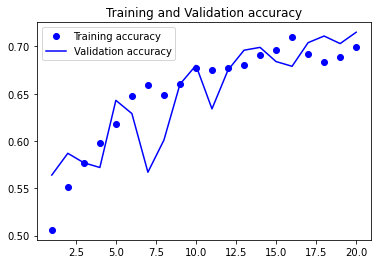

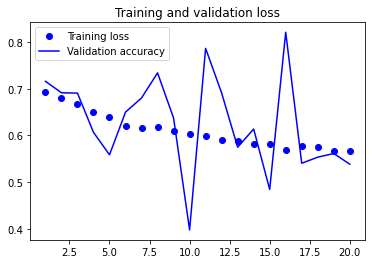

In [25]:
# Plotting the results of the model by using the matplotlib. Plotting the training and validation accuracy.

from cProfile import label
import matplotlib.pyplot as plt

training_acc = history.history['acc']
validation_acc= history.history['val_acc']
training_loss = history.history['loss']
validation_loss = history.history['val_loss'] 


epochs = range(1, len(training_acc)+1)

plt.plot(epochs, training_acc, 'bo', label='Training accuracy')
plt.plot(epochs, validation_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, training_loss, 'bo', label = 'Training loss')
plt.plot(epochs, validation_loss, 'b', label = 'Validation accuracy')
plt.title("Training and validation loss")
plt.legend()

plt.show()



# Inferencing with random testing images. 

1.0


'dog'

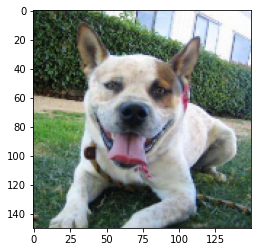

In [64]:
img=cv2.imread(test_data_loc+'/12470.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(150,150))
plt.imshow(img)
img=np.expand_dims(img, axis=0)

res=model.predict(img)

print(res[0][0])

pred = np.round(res[0][0])

lbl_map ={0:'cat', 1:'dog'}

lbl_map[pred]

1.0
This is a:  dog


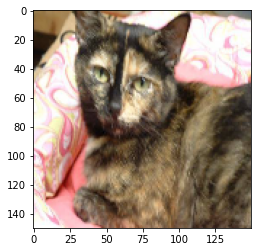

In [67]:
img=cv2.imread(test_data_loc+'/12327.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(150,150))
plt.imshow(img)
img=np.expand_dims(img, axis=0)

res=model.predict(img)

lbl_map ={0:'cat', 1:'dog'}

pred = np.round(res[0][0])

print(res[0][0])

print('This is a: ',lbl_map[pred])





